<a href="https://colab.research.google.com/github/MarcosRMG/Estudos-Data-Science/blob/main/Regress%C3%A3o_Linear_Testando_rela%C3%A7%C3%B5es_e_prevendo_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [ ]:
# Tratamento do dados
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Teste de hipótese
from scipy.stats import norm

# Métricas
from sklearn.metrics import mean_squared_error

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [ ]:
fonte_1 = 'https://raw.githubusercontent.com/MarcosRMG/Estudos-Data-Science/main/dados/Consumo_cerveja.csv'

dados = pd.read_csv(fonte_1, sep=';')

## Visualizar os dados

In [ ]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Verificando o tamanho do dataset

In [ ]:
dados.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [ ]:
dados.describe().round()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.0,365.0,365.0,365.0,365.0,365.0
mean,21.0,17.0,27.0,5.0,0.0,25401.0
std,3.0,3.0,4.0,12.0,0.0,4399.0
min,13.0,11.0,14.0,0.0,0.0,14343.0
25%,19.0,15.0,24.0,0.0,0.0,22008.0
50%,21.0,18.0,27.0,0.0,0.0,24867.0
75%,23.0,20.0,29.0,3.0,1.0,28631.0
max,29.0,24.0,36.0,95.0,1.0,37937.0


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [ ]:
dados.corr().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

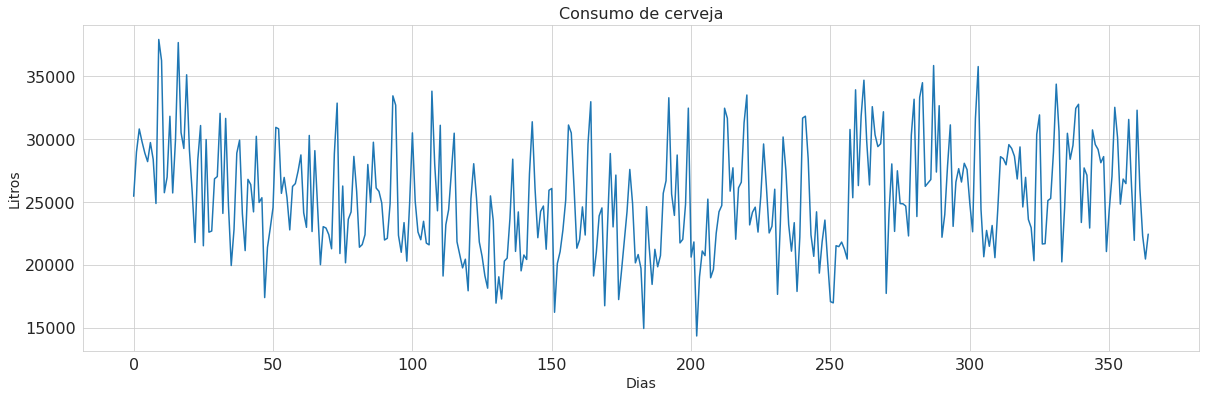

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('Consumo de cerveja', fontsize=16)
ax.set_xlabel('Dias', fontsize=14)
ax.set_ylabel('Litros', fontsize=14)
ax = dados['consumo'].plot(fontsize=16)

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

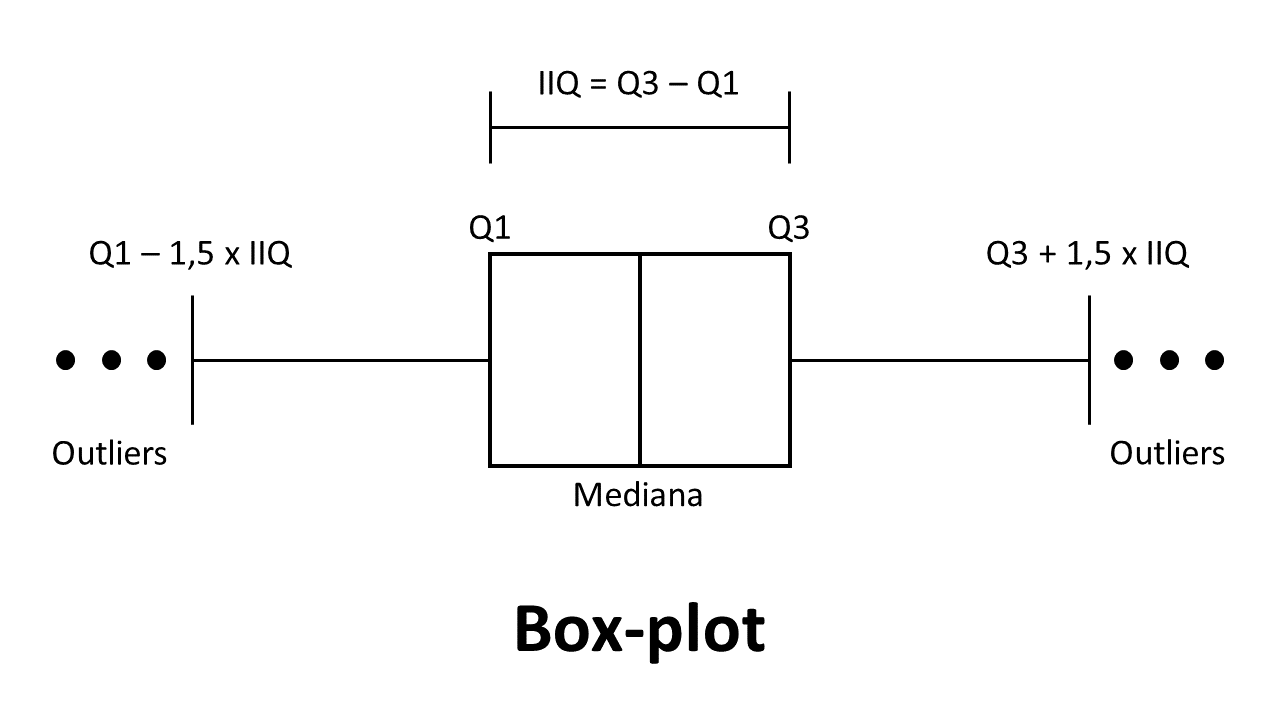

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [ ]:
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0, 0.5, 'Litros')

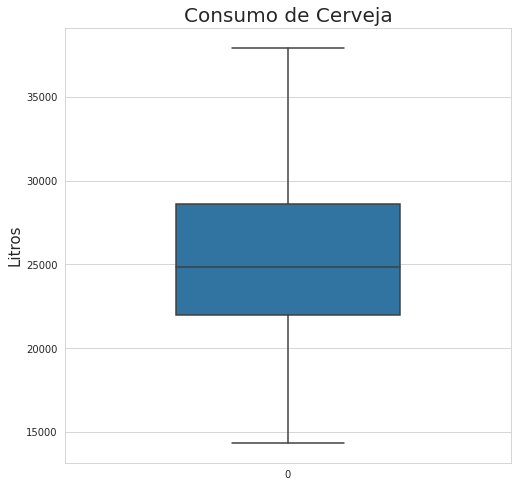

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.boxplot(data=dados['consumo'], width=0.5)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=15)

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

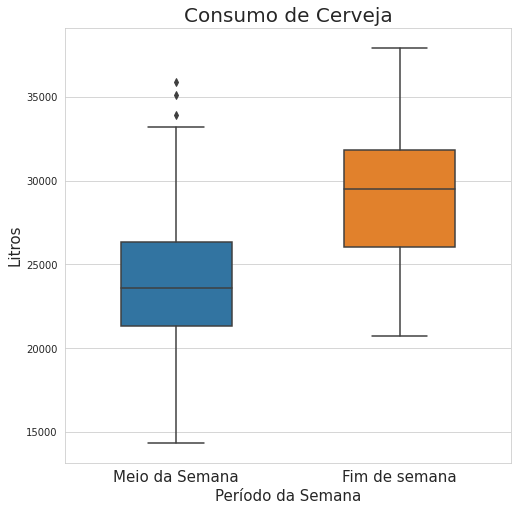

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.boxplot(x='fds', y='consumo', data=dados, width=0.5)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=15)
ax.set_xlabel('Período da Semana', fontsize=15)
plt.xticks([0, 1], ['Meio da Semana', 'Fim de semana'], fontsize=15);

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

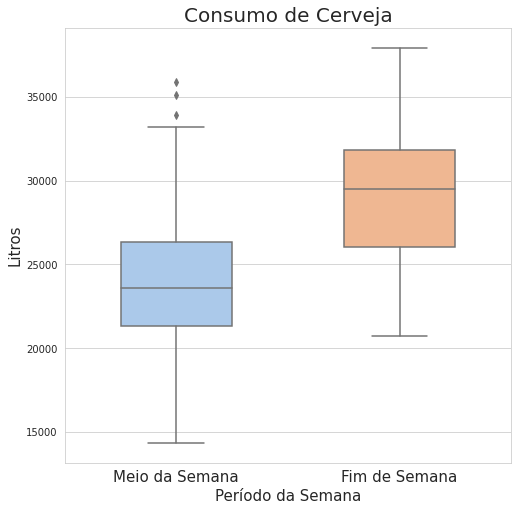

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 8))
ax = sns.boxplot(x='fds', y='consumo', data=dados, width=0.5, palette='pastel')
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=15)
ax.set_xlabel('Período da Semana', fontsize=15)
plt.xticks([0, 1], ['Meio da Semana', 'Fim de Semana'], fontsize=15)
ax

Como esperado, o consumo de cerveja no final de semana é estatisticamente maior, mas o quanto maior é o consumo de cerveja no final de semana?

In [ ]:
#Data frame with beer consumption participation in the week and weekend
consumo_periodo_semana = pd.DataFrame({
    'Final de Semana': [round((dados.query('fds == 1')['consumo'].sum() / dados['consumo'].sum()) * 100, 2)],
    'Meio de Semana': [round((dados.query('fds == 0')['consumo'].sum() / dados['consumo'].sum()) * 100, 2)]},
    index=['%'])

In [ ]:
consumo_periodo_semana

,Final de Semana,Meio de Semana
%,32.44,67.56


Apesar de as estatísticas descritivas apontarem para o final de semana como os dias de maior consumo (mediana), o período do meio da semana possui a maior proporção de consumo total, a razão é que o meio da semana possui mais dias, apesar de a maior parte das pessoas trabalharem nesses dias.

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


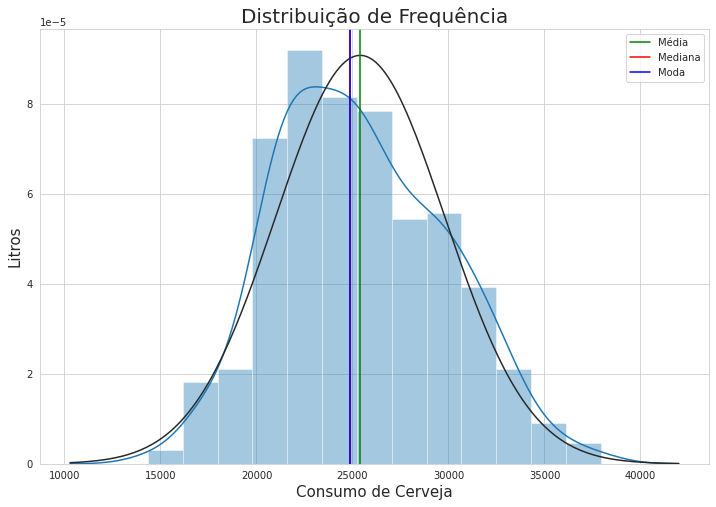

In [ ]:
sns.set_style('whitegrid')
ax = sns.distplot(dados['consumo'], fit=norm) 
ax.figure.set_size_inches(12, 8) 
ax.set_title('Distribuição de Frequência', fontsize=20)
ax.set_xlabel('Consumo de Cerveja', fontsize=15)
ax.set_ylabel('Litros', fontsize=15)
plt.axvline(x=dados['consumo'].mean(), color='g', label='Média') 
plt.axvline(x=dados['consumo'].median(), color='r', label='Mediana')
plt.axvline(x=dados['consumo'].mode().values, color='b', label='Moda')
plt.legend()
ax

In [ ]:
print(f'Média diária do consumo de cerveja: {round(dados["consumo"].mean())}')

Média diária do consumo de cerveja: 25401


In [ ]:
print(f'Mediana do consumo de cerveja: {round(dados["consumo"].median())}')

Mediana do consumo de cerveja: 24867


In [ ]:
print(f'Moda do consumo de cerveja: {round(dados["consumo"].mode())}')

Moda do consumo de cerveja: 0    24862
dtype: int64


In [ ]:
dados['consumo'].mode()[0] < dados['consumo'].median() < dados['consumo'].mean()

True

A distribuição do consumo de cerveja é assimétrica a direita.

Média > Mediana > Moda

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

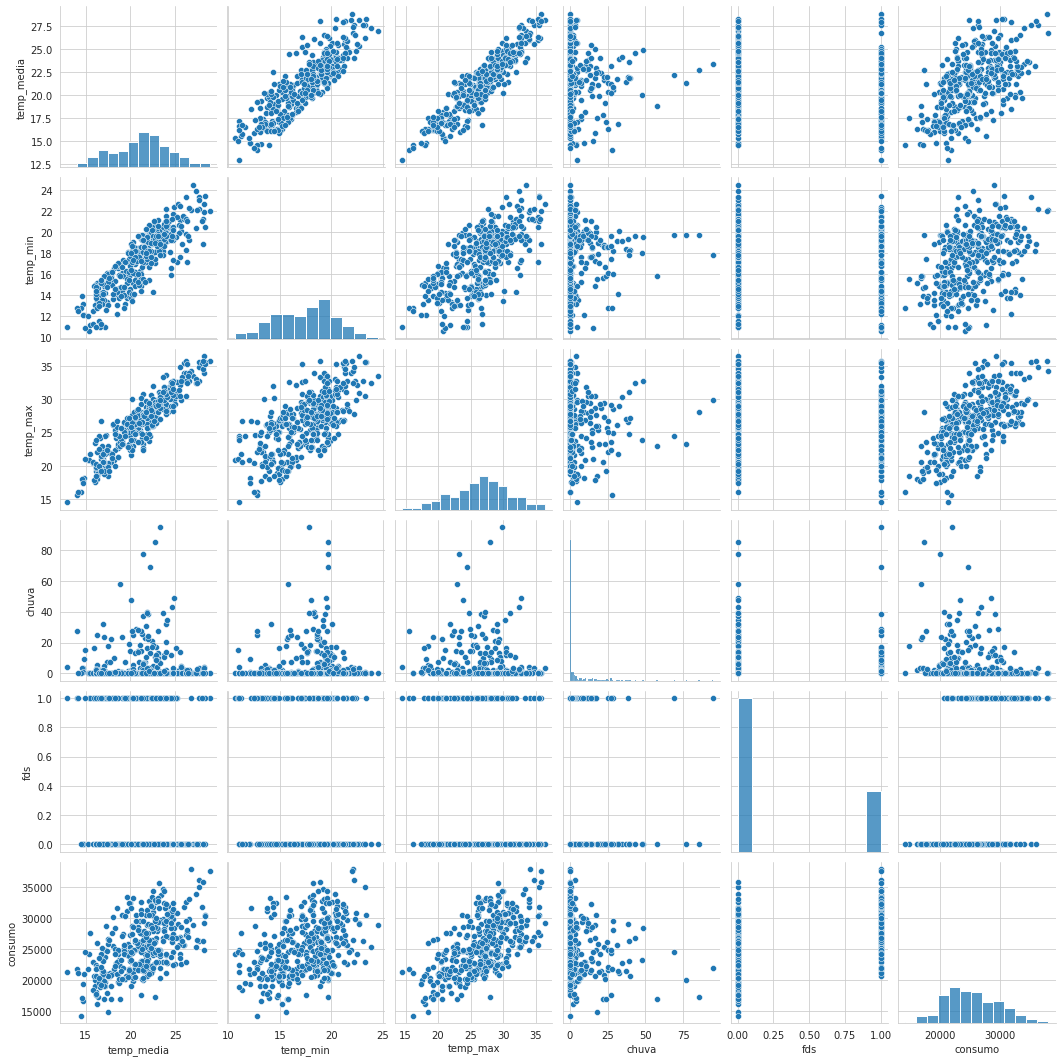

In [ ]:
sns.pairplot(dados, palette='pastel')


Altas temperaturas em São Paulo - Brasil (2015) influencia diretamente o consumo de cerveja; mas essa relação também pode ser observada em locais de baixa temperatura?

## Plotando o pairplot fixando somente uma variável no eixo y

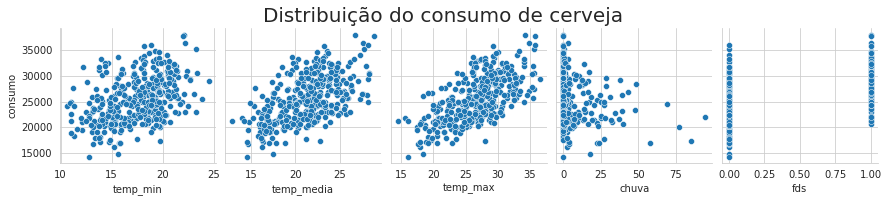

In [ ]:
sns.set_style('whitegrid')
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 
                                             'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Distribuição do consumo de cerveja', fontsize=20, y=1.08);

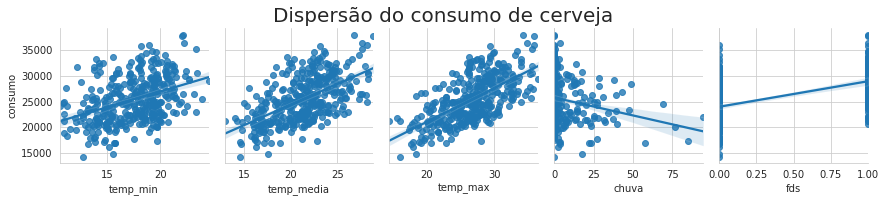

In [ ]:
sns.set_style('whitegrid')
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 
                                             'temp_max', 'chuva', 'fds'],
                  kind='reg')
ax.fig.suptitle('Dispersão do consumo de cerveja', fontsize=20, y=1.08);

O gráfico comprova a forte correlação entre o consumo de cerveja e altas temperaturas, e a relativa correlação negativa entre o consumo de cerveja e as chuvas.

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

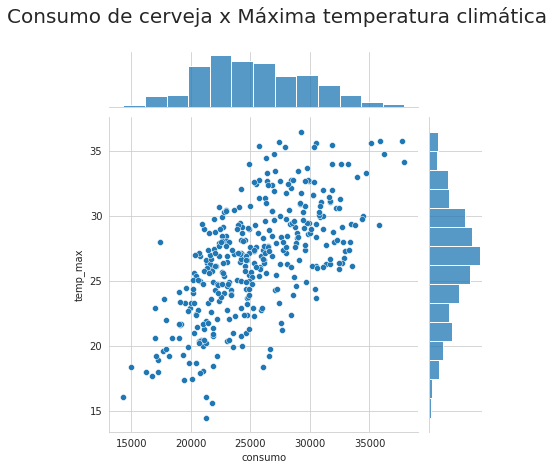

In [ ]:
ax = sns.jointplot(x='consumo', y='temp_max', data=dados)
ax.fig.suptitle('Consumo de cerveja x Máxima temperatura climática', fontsize=20, 
                y=1.08);

## Plotando um jointplot com a reta de regressão estimada

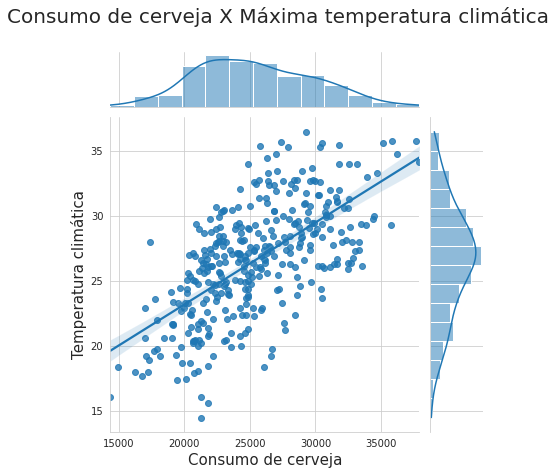

In [ ]:
ax = sns.jointplot(x='consumo', y='temp_max', data=dados, kind='reg')
ax.fig.suptitle('Consumo de cerveja X Máxima temperatura climática', fontsize=20, 
                y=1.08)
ax.set_axis_labels(xlabel='Consumo de cerveja', ylabel='Temperatura climática',
                   fontsize=15);

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

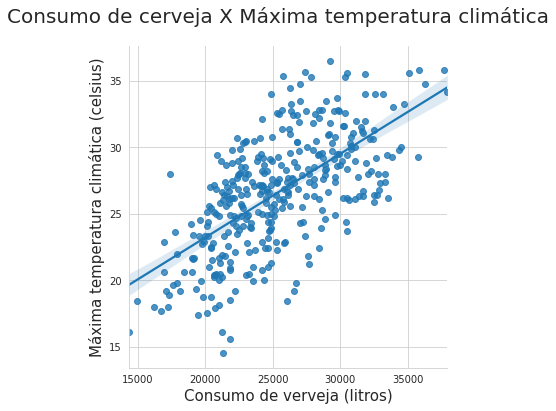

In [ ]:
ax = sns.lmplot(x='consumo', y='temp_max', data=dados)
ax.fig.suptitle('Consumo de cerveja X Máxima temperatura climática', fontsize=20, 
                y=1.08)
ax.set_xlabels('Consumo de verveja (litros)', fontsize=15)
ax.set_ylabels('Máxima temperatura climática (celsius)', fontsize=15);

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

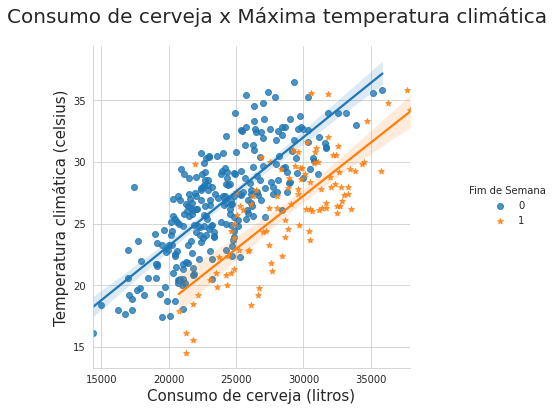

In [ ]:
ax = sns.lmplot(x='consumo', y='temp_max', hue='fds', data=dados, 
                markers=['o', '*'], legend=False)
ax.fig.suptitle('Consumo de cerveja x Máxima temperatura climática', fontsize=20, 
                y=1.08)
ax.set_xlabels('Consumo de cerveja (litros)', fontsize=15)
ax.set_ylabels('Temperatura climática (celsius)', fontsize=15)
ax.add_legend(title='Fim de Semana');

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

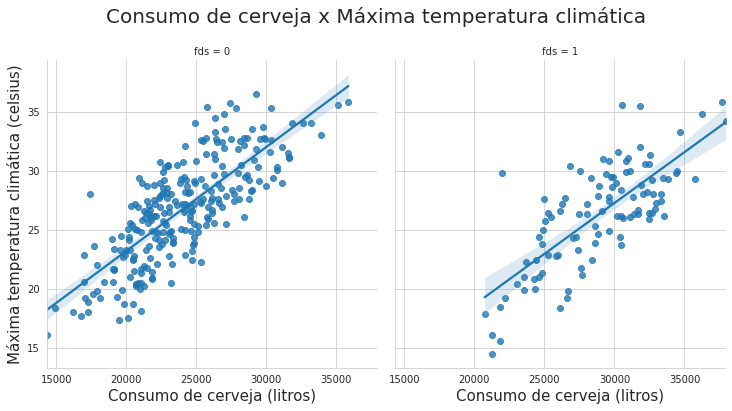

In [ ]:
ax = sns.lmplot(x='consumo', y='temp_max', data=dados, col='fds')
ax.fig.suptitle('Consumo de cerveja x Máxima temperatura climática', fontsize=20, 
                y=1.08)
ax.set_xlabels('Consumo de cerveja (litros)', fontsize=15)
ax.set_ylabels('Máxima temperatura climática (celsius)', fontsize=15);

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>scikit-learn</b> é um módulo Python especializado em soluções para <b>machine learning</b>.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [ ]:
#Variavel dependente
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [ ]:
#Variavel explicativa, a variavel dependente aumenta ou diminui em função dessas variaveis
X = dados[['temp_max', 'fds', 'chuva']]

## Criando os datasets de treino e de teste

In [ ]:
seed = np.random.seed(384)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=seed)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [ ]:
#Dados de treino para as variaveis explicativas (70%)
X_train.shape

(255, 3)

In [ ]:
#Dados de teste para as variaveis explicativas (30%)
X_test.shape

(110, 3)

In [ ]:
#Dados de treino
dados.shape[0] * 0.7

255.49999999999997

In [ ]:
#Dados de teste
dados.shape[0] * .3

109.5

In [ ]:
#Numero de dias do conjunto de dados
X_train.shape[0] + X_test.shape[0]

365

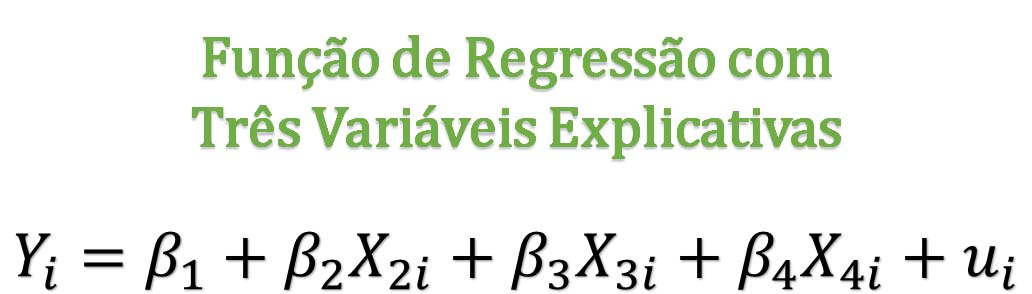

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
#O modelo se ajusta aos dados de treino
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
print(f'R² modelo: {modelo.score(X_train, y_train).round(2)}')

R² modelo: 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
print(f'R² previsões: {metrics.r2_score(y_test, y_previsto).round(2)}')

R² previsões: 0.68


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [ ]:
entrada = X_test[:1]
entrada

,temp_max,fds,chuva
98,25.6,0,0.0


## Gerando previsão pontual

In [ ]:
print(f'''
Variaveis explicativas:
Temperatura maxima = 30.5
Final de semana = Nao
Chuva = 12.2
Litros previstos: {modelo.predict(entrada)[0].round(2)}L de consumo de cerveja.
''')


Variaveis explicativas:
Temperatura maxima = 30.5
Final de semana = Nao
Chuva = 12.2
Litros previstos: 23496.36L de consumo de cerveja.



## Criando um simulador simples

In [ ]:
temp_max = 34
final_semana = 1
chuva = 3
entrada = [[temp_max, final_semana, chuva]]

print(f'Litros de consumo de cerveja previsto: {modelo.predict(entrada)[0].round(2)}')

Litros de consumo de cerveja previsto: 34056.53


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

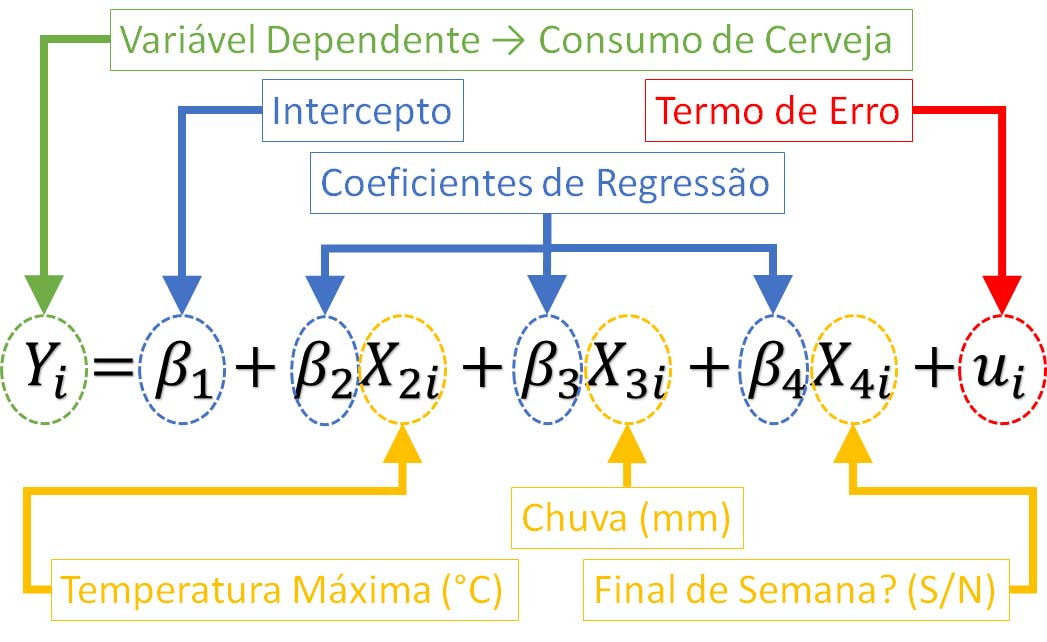

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [ ]:
modelo.intercept_

7123.198247677312

In [ ]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [ ]:
modelo.coef_

array([ 639.5767829 , 5434.35171979,  -82.20963071])

In [ ]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [ ]:
X.columns

Index(['temp_max', 'fds', 'chuva'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [ ]:
indice = ['Intercepto', 'Temperatura Máxima', 'Final de Semana', 'Chuva (mm)']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=indice,
             columns=['Parâmetros'])

,Parâmetros
Intercepto,7123.198248
Temperatura Máxima,639.576783
Final de Semana,5434.351720
Chuva (mm),-82.209631


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [ ]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

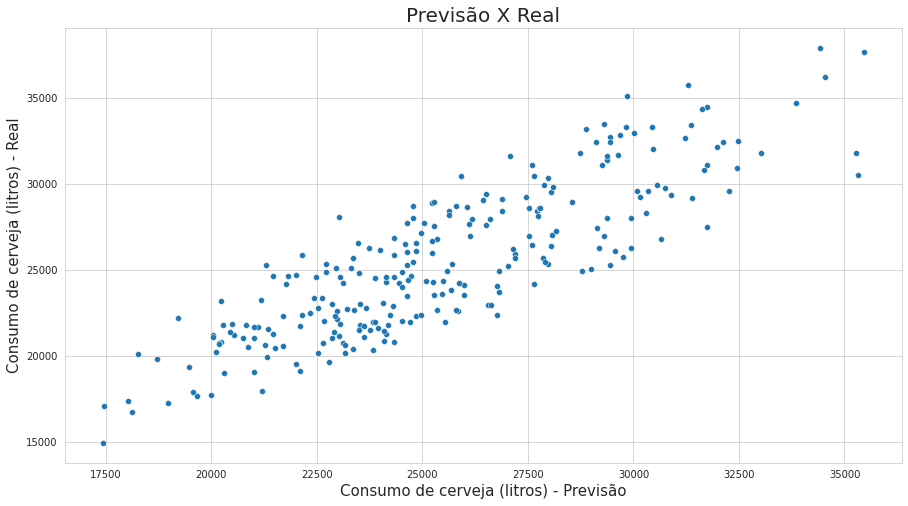

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_previsto_train, y=y_train)
plt.title('Previsão X Real', fontsize=20)
plt.xlabel('Consumo de cerveja (litros) - Previsão', fontsize=15)
plt.ylabel('Consumo de cerveja (litros) - Real', fontsize=15)
plt.show()

## Obtendo os resíduos

In [ ]:
residuo = y_train - y_previsto_train

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

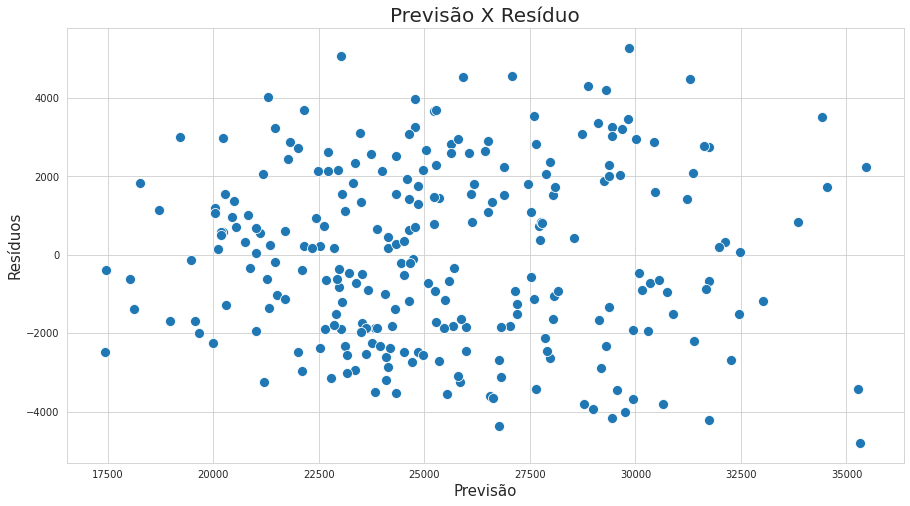

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_previsto_train, y=residuo, s=100)
plt.title('Previsão X Resíduo', fontsize=20)
plt.xlabel('Previsão', fontsize=15)
plt.ylabel('Resíduos', fontsize=15)
plt.show()

## Utilizando os resíduos ao quadrado

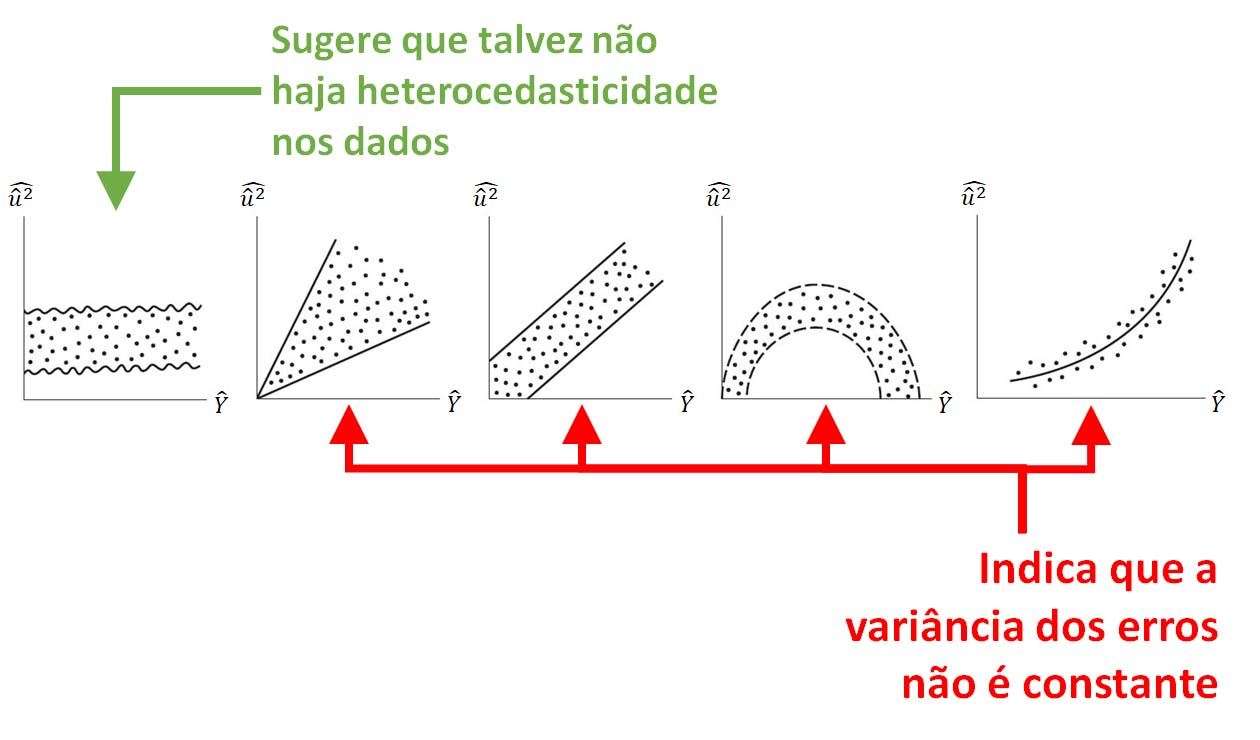

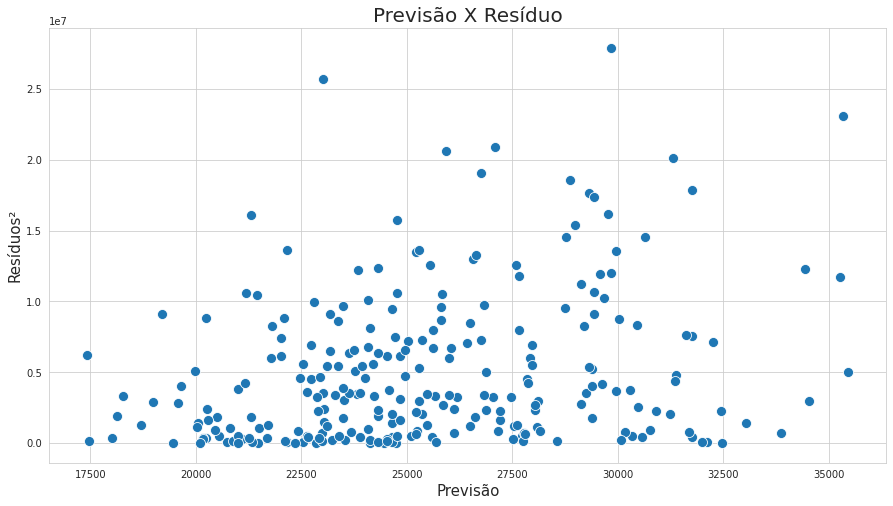

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_previsto_train, y=residuo**2, s=100)
plt.title('Previsão X Resíduo', fontsize=20)
plt.xlabel('Previsão', fontsize=15)
plt.ylabel('Resíduos²', fontsize=15)
plt.show()

## Plotando a distribuição de frequências dos resíduos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


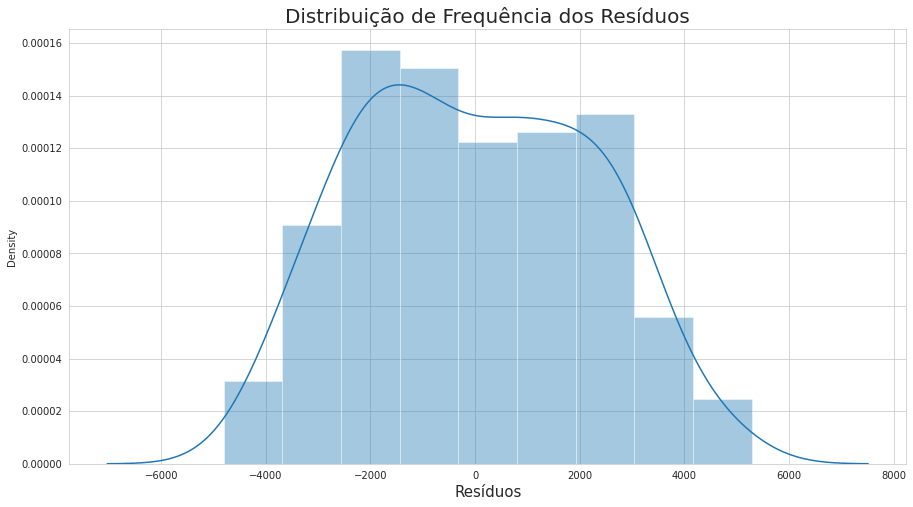

In [ ]:
plt.figure(figsize=(15, 8))
sns.distplot(x=residuo)
plt.title('Distribuição de Frequência dos Resíduos', fontsize=20)
plt.xlabel('Resíduos', fontsize=15)
plt.show()

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [ ]:
X_2 = dados[['temp_media', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [ ]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size=.3,
                                                            random_state=seed)

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [ ]:
modelo_2.fit(X_2_train, y_2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [ ]:
print(f'R² modelo: {modelo.score(X_train, y_train).round(2)}')

R² modelo: 0.73


In [ ]:
print(f'R² modelo: {modelo_2.score(X_2_train, y_2_train).round(2)}')

R² modelo: 0.64


O modelo considerando a temperatura máxima retornou um melhor coeficiente de determinação.

## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [ ]:
y_previsto_2 = modelo_2.predict(X_2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [ ]:
print(f'R² previsões: {metrics.r2_score(y_test, y_previsto).round(2)}')

R² previsões: 0.68


In [ ]:
print(f'R² previsões: {metrics.r2_score(y_2_test, y_previsto_2).round(2)}')

R² previsões: 0.69


Assim como para os dados de treino, o coeficiente de determinação para os dados de teste é melhor para o modelo que considera a temperatura máxima. 

# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

[mean_square_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [ ]:
eqm2 = mean_squared_error(y_2_test, y_previsto_2).round(2)
reqm2 = mean_squared_error(y_2_test, y_previsto_2, squared=False).round(2)
r2_2 = metrics.r2_score(y_2_test, y_previsto_2)

pd.DataFrame([eqm2, reqm2, r2_2], 
             ['Erro Quadrático Médio', 'Raiz do Erro Quadrático Médio', 'R²'],
             columns=['Métricas Temperatura Média'])

,Métricas Temperatura Média
Erro Quadrático Médio,6.900361e+06
Raiz do Erro Quadrático Médio,2.626850e+03
R²,6.900354e-01


## Obtendo métricas para o modelo com Temperatura Máxima

In [ ]:
eqm = round(mean_squared_error(y_test, y_previsto))
reqm =  round(mean_squared_error(y_test, y_previsto, squared=False))
r2 = metrics.r2_score(y_test, y_previsto)

pd.DataFrame(index=['Erro Quadrático Médio', 'Raiz do Erro Quadrático Médio', 'R²'],
             data=[eqm, reqm, r2], columns=['Métricas Temperatura Máxima'])

,Métricas Temperatura Máxima
Erro Quadrático Médio,6.527447e+06
Raiz do Erro Quadrático Médio,2.555000e+03
R²,6.764808e-01


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [ ]:
X_test[0:1]

,temp_max,fds,chuva
98,25.6,0,0.0


In [ ]:
entrada = X_test[0:1]

## Gerando previsão pontual

In [ ]:
modelo.predict(entrada)[0]

23496.36388994405

## Criando um simulador simples

In [ ]:
modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test[0:1]

,temp_max,fds,chuva
98,25.6,0,0.0


In [93]:
temperatura_maxima = 25
chuva = 10
fds = 1
entrada = [[temperatura_maxima, fds, chuva]]
print(f'''
Temperatura máxima: {temperatura_maxima}
Chuva: {chuva}
Fim de Semana: {str(fds).replace('0', 'Não').replace('1', 'Sim')}

Consumo em litros de cerveja previsto: {round(modelo.predict(entrada)[0], 2)}
''')


Temperatura máxima: 25
Chuva: 10
Fim de Semana: Sim

Consumo em litros de cerveja previsto: 27724.87



## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [92]:
import pickle

In [94]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```

In [95]:
modelo = open('modelo_consumo_cerveja', 'rb')
lm_new = pickle.load(modelo)
modelo.close()

In [96]:
temperatura_maxima = 16
chuva = 30
fds = 1
entrada = [[temperatura_maxima, fds, chuva]]
print(f'''
Temperatura máxima: {temperatura_maxima}
Chuva: {chuva}
Fim de Semana: {str(fds).replace('0', 'Não').replace('1', 'Sim')}

Consumo em litros de cerveja previsto: {round(lm_new.predict(entrada)[0], 2)}
''')


Temperatura máxima: 16
Chuva: 30
Fim de Semana: Sim

Consumo em litros de cerveja previsto: 20324.49





---

